## This notebook is to plot the brown dwarf locations in the sky and see which surveys will give background star data about them.
We realized we needed this after using DECaLS and how only 40 of 142 brown dwarfs had background stars near them in DECaLS.

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

from astropy.io import ascii

In [10]:
#copy and pasting import file information from the microlensing equations file

#Reading and formatting ascii table to desired format
candidate_stars = ascii.read('apjsaaf6aft4_ascii.txt', format='tab')
candidate_stars.keep_columns(['(1)', '(2)', '(4)', '(6)', '(8)', '(9)'])

candidate_stars.rename_column('(1)', 'object_name')
candidate_stars.rename_column('(2)', 'J2000_ra')
candidate_stars.rename_column('(4)', 'J2000_dec')
candidate_stars.rename_column('(6)', 'pi_abs')
candidate_stars.rename_column('(8)', 'mu_ra')
candidate_stars.rename_column('(9)', 'mu_dec')

#stars decals that had nearby background_stars. I just manually did this.
decals_list = ['2MASS 0034+0523', 'WISE 0038+2758', 'WISE 0049+2151', 'CFBDS 0133+0231', 'WISE 0226-0211AB', 'WISE 0336-0143', 'WISE 0825+2805', 'WISE 0833+0052', 'WISE 0855-0714', 'WISE 0952+1955', 'WISE 1025+0307', 'ULAS 1043+1048', 'WISE 1124-0421', 'ULAS 1152+1134', 'WISE 1217+1626AB', 'WISE 1225-1013', '2MASS 1231+0847', 'WISE 1254-0728', 'WISE 1301-0302', 'VHS 1433-0837', 'WISE 1517+0529', 'WISE 1523+3125', 'WISE 1542+2230', 'WISE 1614+1739', '2MASS 1615+1340', 'WISE 1721+1117', 'WISE 1738+2732', 'WISE 1804+3117', 'WISE 1812+2007', 'WISE 1813+2835', 'WISE 2147-1029', 'WISE 2157+2659', 'WISE 2209+2711', 'WISE 2301+0216', 'WISE 2319-1844', 'ULAS 2321+1354', 'ULAS 2326+0201', 'WISE 2344+1034', 'WISE 2354+0240', 'WISE 2357+1227']

To find the list of brown dwarfs in PanSTARRS, I need to format the candidate_stars table a little:

In [60]:
candidate_stars.keep_columns(['object_name', 'J2000_ra', 'J2000_dec'])

#make into pandas readable form
c_s_array = list()
for i in candidate_stars:
    c_s_array.append((i[0], i[1], i[2]))
candidate_stars_df = pd.DataFrame(c_s_array, columns=['target', 'ra', 'dec'])

candidate_stars_df.to_csv('cstars_panstarrs.csv', index=False)

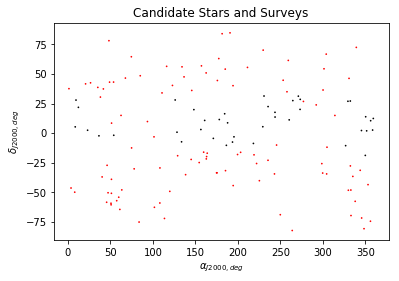

In [30]:
point_list_a, point_list_d, color_list = list(), list(), list()
for i in range(len(candidate_stars)):
    point_list_a.append(list(candidate_stars['J2000_ra'])[i])
    point_list_d.append((candidate_stars['J2000_dec'])[i])
    
    if list(candidate_stars['object_name'])[i] in decals_list:
        color_list.append('black')
    else:
        color_list.append('red')
    
plt.scatter(point_list_a, point_list_d, c=color_list, s=0.5)

plt.title('Candidate Stars and Surveys')
plt.xlabel(r'$ \alpha_{J2000, deg} $')
plt.ylabel(r'$ \delta_{J2000, deg}$')

plt.savefig('surveys_and_dwarfs')

In [61]:
candidate_stars

object_name,J2000_ra,J2000_dec
str16,float64,float64
WISE 0005+3737,1.32412,37.622066
WISE 0015-4615,3.775288,-46.255526
WISE 0032-4946,8.128906,-49.781951
2MASS 0034+0523,8.71741,5.385402
WISE 0038+2758,9.621136,27.981175
WISE 0049+2151,12.439742,21.855396
WISE 0123+4142,20.889465,41.701367
CFBDS 0133+0231,23.26089,2.524552
WISE 0146+4234AB,26.73558,42.569411
